In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh as bk
sns.set_style('whitegrid')
%matplotlib inline
from sklearn import linear_model 
from sklearn import metrics
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost 

## First visualisations of the data

In [5]:
# get global temp csv file as a DataFrame
df = pd.read_csv("C://Users//user//Downloads//GlobalTemperatures.csv", sep=',')
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Delete all columns except dates, Land Average Temperatures, Land Average Temperature Uncertainty
df=df.drop(df.columns[3:], axis=1)

#Delete all empty lines
df=df.dropna()


In [8]:
#Resizing the datasets, we only keep the year averages

date=df['dt'].apply(lambda x: x[:4])
years = np.unique(date)
mean_temps_global=[]
mean_temps_uncertainty=[]

for y in years:
    
    mean_temps_global.append(df[y==date]['LandAverageTemperature'].mean())
    mean_temps_uncertainty.append(df[y==date]['LandAverageTemperatureUncertainty'].mean())
    
#Defining a function that classifies the average temperatures 

def heat(x):

    if type(x) is str:
        return x
    elif x<=7:
        return 3
    elif x>7 and x<=8:
        return 2
    else:
        return 1

#Building of a new, simpler dataframe

years=pd.to_numeric(years)

d1={'Dates': pd.Series(years),'Temperatures':pd.Series(mean_temps_global),'Uncertainty':pd.Series(mean_temps_uncertainty)}

df_global_mean=pd.DataFrame(d1)

#Adding the heat function 

e=df_global_mean.applymap(heat)

d2={'Dates': pd.Series(years),'Temperatures':pd.Series(mean_temps_global),'Uncertainty':pd.Series(mean_temps_uncertainty),
    'Heat':e['Temperatures']}

df_global_mean=pd.DataFrame(d2)

In [12]:
#Now, we plot the 95% Uncertainty regarding the temperature evolution

from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, Circle, HoverTool, CustomJS
from bokeh.io import output_notebook

output_notebook()

(x, y) = (df_global_mean['Dates'], df_global_mean['Uncertainty'])

# Basic plot setup
p = figure(width=800, height=600, toolbar_location=None, title='A clear decreasing of uncertainty')

p.line(x, y, line_dash="4 4", line_width=1, color='gray')


# Add a circle, that is visible only when selected
source = ColumnDataSource({'x': x, 'y': y})
invisible_circle = Circle(x='x', y='y', fill_color='gray', fill_alpha=0.05, line_color=None, size=20)
visible_circle = Circle(x='x', y='y', fill_color='firebrick', fill_alpha=0.5, line_color=None, size=20)
cr = p.add_glyph(source, invisible_circle, selection_glyph=visible_circle, nonselection_glyph=invisible_circle)

# Add a hover tool, that selects the circle
code = "source.set('selected', cb_data['index']);"
callback = CustomJS(args={'source': source}, code=code)
p.add_tools(HoverTool(tooltips=None, callback=callback, renderers=[cr], mode='hline'))

show(p)

Loading BokehJS ...

In [14]:
#Loading the Min and Max data

global_temps2 = pd.read_csv("C://Users//user//Downloads//GlobalTemperatures.csv", sep=',')

# Starting in 1800 when data is more significant (less NaN)

list_of_years_1800=years[50:]

# Compute Average, Max, Min Temperature by Year since 1800

date=global_temps2['dt'].apply(lambda x: x[:4])
list_of_years_1800=np.unique(date)
list_of_years_1800=list_of_years_1800[50:]

mean_temps_1800=[]
min_temps_1800=[]
max_temps_1800=[]

for y in list_of_years_1800:
    
    mean_temps_1800.append(global_temps2[y==date]['LandAverageTemperature'].mean())
    max_temps_1800.append(global_temps2[y==date]['LandMaxTemperature'].mean())
    min_temps_1800.append(global_temps2[y==date]['LandMinTemperature'].mean())

#Building of a new, simpler dataframe

list_of_years_1800=pd.to_numeric(list_of_years_1800)

d1={'Average Temperature':pd.Series(mean_temps_1800), 'Dates': pd.Series(list_of_years_1800),
   'Min Temperature':pd.Series(min_temps_1800),'Max Temperature':pd.Series(max_temps_1800)}

global_temps_1800=pd.DataFrame(d1)

global_temps_1800=global_temps_1800[['Dates','Average Temperature','Min Temperature','Max Temperature']]


In [15]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, Circle, HoverTool, CustomJS
from bokeh.io import output_notebook

output_notebook()

x = global_temps_1800['Dates']
y = global_temps_1800['Average Temperature']
z = global_temps_1800['Min Temperature']
t = global_temps_1800['Max Temperature']

p = figure(plot_width=600, plot_height=600)


p.line(x, y, legend="Average Temperature", line_color="green", line_width=3)

p.line(x,z, legend="Min Temperature", line_color="blue", line_width=3)

p.line(x, t, legend="Max Temperature", line_color="red", line_width=3)

# change just some things about the x-grid
p.xgrid.band_fill_alpha = 0.05
p.xgrid.band_fill_color = "navy"

p.legend.location = "top_left"
p.legend.glyph_width = 2
p.legend.label_width=2


show(p)

Loading BokehJS ...

## Linear Regression

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model


temp=global_temps_1800['Average Temperature']
time=global_temps_1800['Dates']


# The data sets
dates_X = time.iloc[0:,]

# The targets 
temperature_y = temp.iloc[0:,]

# Create linear regression object
reg = linear_model.LinearRegression()

# Train the model using the data sets
reg.fit(dates_X.to_frame(),temperature_y.to_frame())

# The estimation
output_reg=reg.predict(dates_X.to_frame())
output_simple=np.copy(output_reg)
output=pd.DataFrame(index=pd.DataFrame(output_simple).index.values)
# The coefficients
print('Coefficients: \n', reg.coef_)
# The intercept
print('Intercept: \n', reg.intercept_)


# The mean squared error
print("Mean squared error: %.2f" % np.mean((reg.predict(dates_X.to_frame()) - temperature_y.to_frame()) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % reg.score(dates_X.to_frame(), temperature_y.to_frame()))


Coefficients: 
 [[0.00721859]]
Intercept: 
 [-5.35578585]
Mean squared error: 0.12
Variance score: 0.64


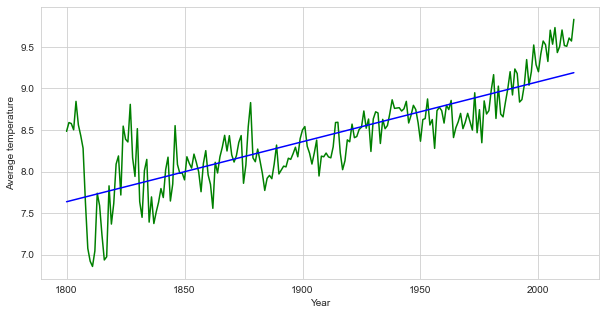

In [17]:
# Linear regression cuve on the predicted values

# Simple Linear Regression: t : Regression done on the values between 1800 and 1950 and testes between 1950 and 2016
fig, axes = plt.subplots(figsize=(10,5))
axes.set_ylabel('Average temperature')
axes.set_xlabel('Year')
plt.plot(dates_X, temperature_y, label='Annual Mean temperature', color='g')
plt.plot(dates_X,output_simple,label='Forecast Temperature by Regression',color='b')

In [18]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

#Define the input and output
temp=global_temps_1800['Average Temperature']
time=global_temps_1800['Dates']

# Split the data into training/testing sets
dates_X_train = time.iloc[0:150,]
dates_X_test = time.iloc[150:,]

# Split the targets into training/testing sets
temperature_y_train = temp.iloc[0:150,]
temperature_y_test = temp.iloc[150:,]

# Create linear regression object
reg = linear_model.LinearRegression()

# Train the model using the training sets
reg.fit(dates_X_train.to_frame(),temperature_y_train.to_frame())

# The coefficients
print('Coefficients: \n', reg.coef_)
# The intercept
print('Intercept: \n', reg.intercept_)

# The prediction
output_simple=reg.predict(dates_X_test.to_frame())
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((reg.predict(dates_X_test.to_frame()) - temperature_y_test.to_frame()) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % reg.score(dates_X_test.to_frame(), temperature_y_test.to_frame()))


Coefficients: 
 [[0.00570766]]
Intercept: 
 [-2.53305848]
Mean squared error: 0.14
Variance score: 0.16


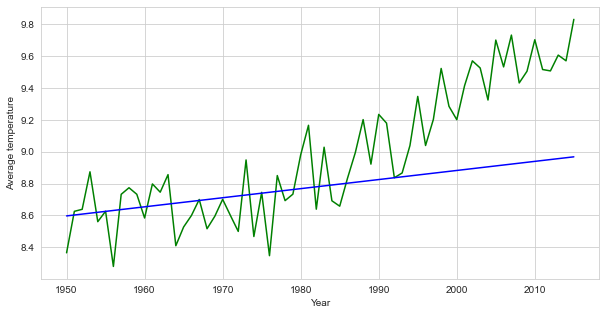

In [19]:
# Simple Linear Regression: t : Regression done on the values between 1800 and 1950 and testes between 1950 and 2016
fig, axes = plt.subplots(figsize=(10,5))
axes.set_ylabel('Average temperature')
axes.set_xlabel('Year')
plt.plot(dates_X_test, temperature_y_test, label='Annual Mean temperature', color='g')
plt.plot(dates_X_test,output_simple,label='Forecast Temperature by Regression',color='b')


## Polynomial Regression

In [20]:
time=pd.DataFrame()
time["Dates"]=global_temps_1800['Dates']
time["Dates^2"]=global_temps_1800['Dates']*global_temps_1800['Dates']
time["Dates^3"]=global_temps_1800['Dates']*global_temps_1800['Dates']*global_temps_1800['Dates']
temp=global_temps_1800['Average Temperature']


# The data sets
dates_X = time.iloc[0:,0]

# The targets 
temperature_y = temp.iloc[0:,]

# Create linear regression object
reg = linear_model.LinearRegression()

# Train the model using the training sets
reg.fit(time.iloc[0:,],temperature_y.to_frame())

# The prediction
output_reg=reg.predict(time.iloc[0:,])
output_multiple=np.copy(output_reg)
output=pd.DataFrame(index=pd.DataFrame(output_simple).index.values)
# The coefficients
print('Coefficients: \n', reg.coef_)
# The intercept
print('Intercept: \n', reg.intercept_)

# The mean squared error
print("Mean squared error: %.2f" % np.mean((output_reg - temperature_y.to_frame()) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % reg.score(time.iloc[0:,], temperature_y.to_frame()))

# Euclidian Distance
output['Predicted Temperature']=pd.DataFrame(output_multiple)
output["Average Temperature"]=temp

Coefficients: 
 [[ 1.54583760e+00 -8.43972200e-04  1.53912499e-07]]
Intercept: 
 [-937.81103858]
Mean squared error: 0.10
Variance score: 0.69


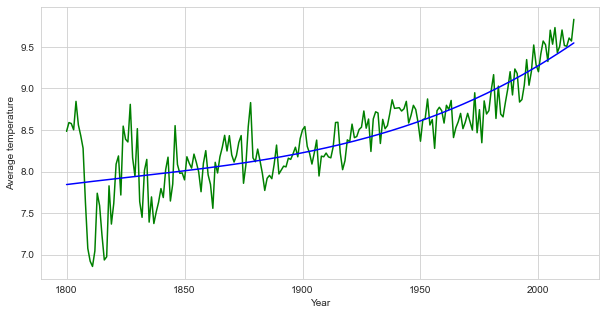

In [22]:
#Regression done on the values between 1800 and 1950 and testes between 1950 and 2016
fig, axes = plt.subplots(figsize=(10,5))
axes.set_ylabel('Average temperature')
axes.set_xlabel('Year')
plt.plot(dates_X, temperature_y, label='Annual Mean temperature', color='g')
plt.plot(dates_X,output_multiple,label='Forecast Reg',color='b')

In [23]:
temp=global_temps_1800['Average Temperature']
time=pd.DataFrame()
time["Dates"]=global_temps_1800['Dates']
time["Dates^2"]=global_temps_1800['Dates']*global_temps_1800['Dates']
time["Dates^3"]=global_temps_1800['Dates']*global_temps_1800['Dates']*global_temps_1800['Dates']

# Split the data into training/testing sets
dates_X_train = time.iloc[0:150,0]
dates_X_test = time.iloc[150:,0]

# Split the targets into training/testing sets
temperature_y_train = temp.iloc[0:150,]
temperature_y_test = temp.iloc[150:,]

# Create linear regression object
reg = linear_model.LinearRegression()

# Train the model using the training sets
reg.fit(time.iloc[0:150,],temperature_y_train.to_frame())

# The coefficients
print('Coefficients: \n', reg.coef_)
# The intercept
print('Intercept: \n', reg.intercept_)

# The prediction
output_multiple=reg.predict(time.iloc[150:,])
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((reg.predict(time.iloc[150:,]) - temperature_y_test.to_frame()) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % reg.score(time.iloc[150:,], temperature_y_test.to_frame()))

Coefficients: 
 [[-3.37849536e+00  1.75645409e-03 -3.03542634e-07]]
Intercept: 
 [2168.61282323]
Mean squared error: 0.10
Variance score: 0.42


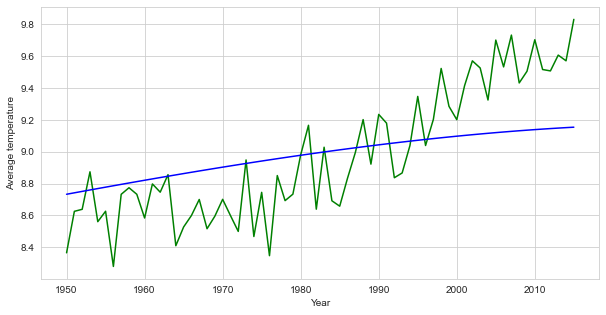

In [24]:
fig, axes = plt.subplots(figsize=(10,5))
axes.set_ylabel('Average temperature')
axes.set_xlabel('Year')
# 
plt.plot(dates_X_test, temperature_y_test, label='Annual Mean temperature', color='g')
plt.plot(dates_X_test,output_multiple,label='Forecast Reg',color='b')


## Correlation Matrix


<AxesSubplot:>

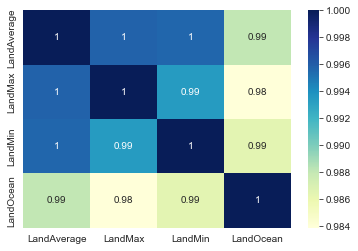

In [26]:
#Correlation Matrix for the following features : LandAverageTemperature, LandMaxTemperature, LandMinTemperature,LandAndOceanAverageTemperature
global_temperatures=pd.read_csv("C://Users//user//Downloads//GlobalTemperatures.csv", sep=',')
global_temperatures['dt'] = pd.to_datetime(global_temperatures['dt'])
global_temperatures=global_temperatures.drop(['LandAverageTemperatureUncertainty',"LandMaxTemperatureUncertainty","LandMinTemperatureUncertainty","LandAndOceanAverageTemperatureUncertainty"],axis=1)
global_temperatures=global_temperatures.dropna()
corr=global_temperatures.corr()
sns.heatmap(corr,xticklabels=['LandAverage','LandMax','LandMin','LandOcean'], yticklabels=['LandAverage','LandMax','LandMin','LandOcean'], annot=True,cmap="YlGnBu")


## Random Forest

In [27]:
# Train
train_df_copy=pd.DataFrame.copy(global_temperatures[global_temperatures['dt'].map(lambda x: x.year)<1980])
train_df=pd.DataFrame.copy(train_df_copy)
train_df.drop(train_df.index[:1], inplace=True)
train_df_copy.drop(train_df.index[-1],inplace=True)

# To predict each average land temperature we use the previous year's temperatures (landandocean, min, max)
for j in (train_df.index):
    for column in train_df.columns[1:-1]:
        train_df.loc[j,column]=train_df_copy.loc[j-1,column]
forest = RandomForestRegressor(n_estimators=10)
train_df=train_df.drop(['dt'],axis=1)
forest = forest.fit(train_df.drop(["LandAverageTemperature"],axis=1),train_df["LandAverageTemperature"])

In [28]:
# Test
test_df_copy=pd.DataFrame.copy(global_temperatures[global_temperatures['dt'].map(lambda x: x.year)>=1980])
test_df=pd.DataFrame.copy(test_df_copy)
test_df.drop(test_df.index[:1], inplace=True)
test_df_copy.drop(test_df.index[-1], inplace=True)

# To predict each average land temperature we use the previous year's temperatures (landandocean, min , max)
for j in (test_df.index):
    for column in test_df.columns[1:-1]:
        test_df.loc[j,column]=test_df_copy.loc[j-1,column]
test_df=test_df.drop(['dt'],axis=1)
output = forest.predict(test_df.drop(["LandAverageTemperature"],axis=1))

In [29]:
#Adding the predicted temperature to our output DF
test_df['Predicted_temp']=output

In [30]:
# Distance computing
MED=abs(test_df['LandAverageTemperature']-test_df['Predicted_temp']).mean()

In [31]:
MED

0.24371299303944335

## XGBoost

In [32]:
# Packages
import xgboost 
from xgboost import XGBRegressor

In [33]:
# Train
train_df_copy_2=pd.DataFrame.copy(global_temperatures[global_temperatures['dt'].map(lambda x: x.year)<1980])
train_df_2=pd.DataFrame.copy(train_df_copy_2)
train_df_2.drop(train_df_2.index[:1], inplace=True)
train_df_copy_2.drop(train_df_2.index[-1], inplace=True)

# To predict each average land temperature we use the previous year's temperatures (landandocean, min , max)
for j in (train_df_2.index):
    for column in train_df_2.columns[1:-1]:
        train_df_2.loc[j,column]=train_df_copy_2.loc[j-1,column]
forest2 = XGBRegressor()
train_df_2=train_df_2.drop(['dt'],axis=1)
forest2 = forest2.fit(train_df_2.drop(["LandAverageTemperature"],axis=1),train_df_2["LandAverageTemperature"])

In [35]:
# Test
test_df_copy_2=pd.DataFrame.copy(global_temperatures[global_temperatures['dt'].map(lambda x: x.year)>=1980])
test_df_2=pd.DataFrame.copy(test_df_copy_2)
test_df_2.drop(test_df_2.index[:1], inplace=True)
test_df_copy_2.drop(test_df_2.index[-1], inplace=True)
# To predict each average land temperature we use the previous year's temperatures (landandocean, min , max)
for j in (test_df_2.index):
    for column in test_df_2.columns[1:-1]:
        test_df_2.loc[j,column]=test_df_copy_2.loc[j-1,column]
test_df_2=test_df_2.drop(['dt'],axis=1)
output = forest2.predict(test_df_2.drop(["LandAverageTemperature"],axis=1))

In [36]:
test_df_2['Predicted_temp']=output

In [37]:
# Distance computing
MED=abs(test_df_2['LandAverageTemperature']-test_df_2['Predicted_temp']).mean()

In [38]:
MED

0.24781643837399955

## Nearest neighbors


In [40]:
from sklearn.neighbors import KNeighborsRegressor

In [41]:
# Train
neigh = KNeighborsRegressor(n_neighbors=2)
train_df_copy_3=pd.DataFrame.copy(global_temperatures[global_temperatures['dt'].map(lambda x: x.year)<1980])
train_df_3=pd.DataFrame.copy(train_df_copy_3)
train_df_3.drop(train_df_3.index[:1], inplace=True)
train_df_copy_3.drop(train_df_3.index[-1], inplace=True)

# To predict each average land temperature we use the previous year's temperatures (landandocean, min , max)
for j in (train_df_3.index):
    for column in train_df_3.columns[1:-1]:
        train_df_3.loc[j,column]=train_df_copy_3.loc[j-1,column]
train_df_3=train_df_3.drop(['dt'],axis=1)
neighbors=neigh.fit(train_df_3.drop(["LandAverageTemperature"],axis=1),train_df_3["LandAverageTemperature"]) 

In [42]:
# Test
test_df_copy_3=pd.DataFrame.copy(global_temperatures[global_temperatures['dt'].map(lambda x: x.year)>=1980])
test_df_3=pd.DataFrame.copy(test_df_copy_3)
test_df_3.drop(test_df_3.index[:1], inplace=True)
test_df_copy_3.drop(test_df_3.index[-1], inplace=True)

# To predict each average land temperature we use the previous year's temperatures (landandocean, min , max)
for j in (test_df_3.index):
    for column in test_df_3.columns[1:-1]:
        test_df_3.loc[j,column]=test_df_copy_3.loc[j-1,column]
test_df_3=test_df_3.drop(['dt'],axis=1)
neigh_output = neighbors.predict(test_df_3.drop(["LandAverageTemperature"],axis=1))

In [43]:
# Adding the predicted temperature to our output DF
test_df_3['Predicted_temp']=neigh_output

In [44]:
MED=abs(test_df_3['LandAverageTemperature']-test_df_3['Predicted_temp']).mean()

In [45]:
MED

0.23760904872389793

## Attempt to minimize the MED

In [54]:
#Definition of the function we want to minimize

def MED_XGB(n,maxi,learn,
       X_train, y_train, X_test,y_test,
       MED_limit):
    

    
    xgb_model = xgboost.XGBRegressor(n_estimators = n , learning_rate = learn, max_depth = maxi )
    model_fit = xgb_model.fit(X_train , y_train )
    y_predict = model_fit.predict(X_test)
    MED=abs(y_test-y_predict).mean()
    
    if MED<MED_limit:
        return MED , n, learn, maxi
    else:
        return 0

In [55]:
#### Data Sets ####

#Train
train_df_copy=pd.DataFrame.copy(global_temperatures[global_temperatures['dt'].map(lambda x: x.year)<1980])
train_df=pd.DataFrame.copy(train_df_copy)
train_df.drop(train_df.index[:1], inplace=True)
train_df_copy.drop(train_df.index[-1], inplace=True)
for j in (train_df.index):
    for column in train_df.columns[1:-1]:
        train_df.loc[j,column]=train_df_copy.loc[j-1,column]

train_df=train_df.drop(['dt'],axis=1)
    
#Test
test_df_copy=pd.DataFrame.copy(global_temperatures[global_temperatures['dt'].map(lambda x: x.year)>=1980])
test_df=pd.DataFrame.copy(test_df_copy)
test_df.drop(test_df.index[:1], inplace=True)
test_df_copy.drop(test_df.index[-1], inplace=True)
for j in (test_df.index):
    for column in test_df.columns[1:-1]:
        test_df.loc[j,column]=test_df_copy.loc[j-1,column]

test_df=test_df.drop(['dt'],axis=1)


X_train = train_df.drop("LandAverageTemperature", axis = 1)
y_train = train_df['LandAverageTemperature']

X_test = test_df.drop("LandAverageTemperature", axis = 1)
y_test = test_df['LandAverageTemperature']

In [56]:
#### HyperParameters ####

max_depth = [2+i for i in range(5)]
learning_rate = [0.01*(i+1) for i in range(5)]
n_estimators = [370+i for i in range(20)]
MED_limit =  0.21
l=[]

In [57]:
#### Very long loop depending on parameters ####

for n in n_estimators:
    for learn in learning_rate:
        for maxi in max_depth:
            a = MED_XGB(n,maxi,learn,X_train,y_train,X_test,y_test,MED_limit)
            if a != 0:
                l.append(a)
                l.sort()

l[:5] # 5 Best MED Results

[(0.20242728570995633, 385, 0.04, 2),
 (0.2024370215962491, 386, 0.04, 2),
 (0.20244119143209427, 387, 0.04, 2),
 (0.20250209825166132, 384, 0.04, 2),
 (0.20251078753017762, 383, 0.04, 2)]

In [59]:
#### GridSearch (Take some time to compute) ####

from xgboost import plot_importance,to_graphviz, plot_tree
from sklearn.model_selection  import GridSearchCV

xgb_model = xgboost.XGBRegressor()

clf = GridSearchCV(xgb_model,
                   {'max_depth': max_depth,
                    'n_estimators': n_estimators,
                   'learning_rate': learning_rate}, verbose=1)

clf.fit(X_train,y_train)
clf.best_score_, clf.best_params_

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


(0.9925820953088234,
 {'learning_rate': 0.02, 'max_depth': 2, 'n_estimators': 370})

## Features importance


In [60]:
maxi = 2
learn = 0.04
n = 385

xgb_model = xgboost.XGBRegressor(max_depth = maxi,
                             learning_rate = learn,
                             n_estimators = n)

model_fit = xgb_model.fit(X_train,y_train)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

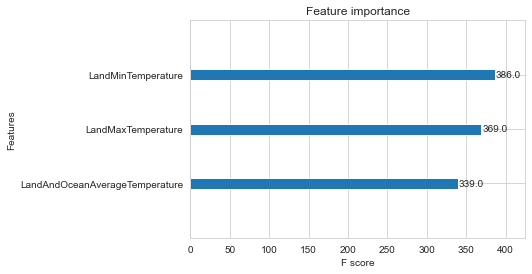

In [61]:
#Ranking the features'importance 
plot_importance(model_fit)

In [64]:
!pip install graphviz

In [67]:
# Adding the CO2 level as a a feature

CO2=pd.read_csv("C://Users//user//Downloads//co2-mm-mlo.csv",sep=",")

# We drop the year 2016 since we don't have the temperatures of 2016
CO2 = CO2.drop(CO2.index[-10:])
CO2["Date"]=CO2["Date"]+"-01"
CO2["Date"]=pd.to_datetime(CO2["Date"])
CO2=CO2.drop(["Decimal Date","Interpolated","Trend","Number of Days"],axis=1)

# We merge the temperatures data with the CO2 data and we keep 
#only the months where we have the average CO2 levels
temperatures=pd.merge(left=global_temperatures,right=CO2, left_on='dt', right_on='Date', how='outer')
temp=pd.DataFrame.copy(temperatures[temperatures['dt'].map(lambda x: x.year)<1980])
temp=temp.dropna()

##### Random Forest

In [68]:
#Sets

# Train
train_df_copy=pd.DataFrame.copy(temp)
train_df=pd.DataFrame.copy(train_df_copy)
train_df.drop(train_df.index[:1], inplace=True)
train_df_copy.drop(train_df.index[-1], inplace=True)

X_train = train_df.drop(["LandAverageTemperature","dt","Date"], axis = 1)
y_train = train_df['LandAverageTemperature']

# Test
test_df_copy=pd.DataFrame.copy(temperatures[temperatures['dt'].map(lambda x: x.year)>=1980])
test_df=pd.DataFrame.copy(test_df_copy)
test_df.drop(test_df.index[:1], inplace=True)
test_df_copy.drop(test_df.index[-1], inplace=True)

X_test = test_df.drop(["LandAverageTemperature","dt","Date"],axis = 1 )
y_test = test_df['LandAverageTemperature']

In [69]:
#Definition of the Minimization Function

def MED_RF(n,maxi,
       X_train, y_train, X_test,y_test,
       MED_limit):
    
#Note that there is no learning_rate for the random forest regressor
    
    
    
    forest = RandomForestRegressor(n_estimators=n,max_depth = maxi)
    model_fit = forest.fit(X_train , y_train )
    y_predict = model_fit.predict(X_test)
    MED=abs(y_test-y_predict).mean()
    
    if MED<MED_limit:
        return MED, n, maxi
    else:
        return 0

In [70]:
#Hyperparameters

max_depth = [8+i for i in range(7)]
n_estimators = [i+1 for i in range(100)]
MED_limit = 0.2
l=[]

In [71]:
#### Minimization (Very long loop depending on parameters) ####

for n in n_estimators:
    for maxi in max_depth:
        a = MED_RF(n,maxi,X_train,y_train,X_test,y_test,MED_limit)
        if a != 0:
            l.append(a)
            l.sort()

l[:5] # 5 Best MED Results

[(0.13500554266563564, 9, 12),
 (0.13506879608146466, 30, 10),
 (0.13692821121428825, 23, 9),
 (0.13729237068377267, 17, 12),
 (0.13780974477958347, 63, 14)]

In [72]:
# GridSearch (very long)

clf = GridSearchCV(forest,
                   {'max_depth': max_depth,
                    'n_estimators': n_estimators}, verbose=1)

clf.fit(X_train,y_train)
clf.best_score_, clf.best_params_

Fitting 5 folds for each of 700 candidates, totalling 3500 fits


(0.9995378623714621, {'max_depth': 14, 'n_estimators': 60})

In [73]:
#Random Forest (GridSearch MED Test)

# To predict each average land temperature we use the previous year's temperatures (landandocean, min , max) and the CO2 level of the current year
for j in (train_df.index):
    for column in train_df.columns[1:-2]:
        train_df.loc[j,column]=train_df_copy.loc[j-1,column]
forest = RandomForestRegressor(max_depth=10,n_estimators=462)
train_df=train_df.drop(['dt',"Date"],axis=1)
forest = forest.fit(train_df.drop(["LandAverageTemperature"],axis=1),train_df["LandAverageTemperature"])

for j in (test_df.index):
    for column in test_df.columns[1:-2]:
        test_df.loc[j,column]=test_df_copy.loc[j-1,column]
test_df=test_df.drop(['dt',"Date"],axis=1)
output = forest.predict(test_df.drop(["LandAverageTemperature"],axis=1))

# Distance computing
test_df['Predicted_temp']=output
MED=abs(test_df['LandAverageTemperature']-test_df['Predicted_temp']).mean()
MED


0.15355030831921537

# Clustering 

### Preparing the DataFrame

In [76]:
country_temps = pd.read_csv("C://Users//user//Downloads//GlobalLandTemperaturesByCountry.csv", sep=',')

#Drop Uncertainty for the clustering
country_temps = country_temps.drop("AverageTemperatureUncertainty", axis = 1)

# Delete all empty lines, change time, and put time as Index
country_temps['dt'] = pd.to_datetime(country_temps['dt'])
country_temps.tail()

#Setting the Countries as Index, time as Columns and Average Temperature as the main Data
pivot = country_temps.pivot("Country","dt","AverageTemperature")
pivot = pivot.drop(pivot.columns[[i for i in range(1274)]+[3238]], axis = 1)
pivot.head()

#Getting rid of all countries with no data

pivot = pivot.dropna(how='all') #aucune donnée pour le pays

#Only one country eliminated

### Country Clustering

##### Adding Median to missing values

In [78]:
from sklearn.impute import SimpleImputer

In [81]:

imp = SimpleImputer(strategy="median")
# Beware: here axis = 1 means rows -> http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html


#Imputer changes type of DataFrame. 

trans_pivot = imp.fit_transform(pivot)
nonan_pivot = pd.DataFrame(trans_pivot)

nonan_pivot.columns = pivot.columns
nonan_pivot.index = pivot.index

nonan_pivot.tail()

print(np.count_nonzero(~np.isnan(nonan_pivot)))

#No missing data, and let's now call the DataFrame : clusterdf

clusterdf = nonan_pivot

475288


C:\Users\user\anaconda3\anaconda_install\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\anaconda_install\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.
  warnings.warn(


##### Clustering Code

In [82]:
def Clustering(df,x,y,orientation,size):
    
    from sklearn.cluster import AgglomerativeClustering
    from scipy.cluster.hierarchy import dendrogram
    import matplotlib.pyplot as plt
    plt.style.use('ggplot')

    ward = AgglomerativeClustering(linkage='ward', compute_full_tree=True).fit(df)
    dendro = [ ]
    for a,b in ward.children_:
        dendro.append([a,b,float(len(dendro)+1),len(dendro)+1])
    
    fig = plt.figure( figsize=(x,y) )
    ax = fig.add_subplot(1,1,1) 
    r = dendrogram(
        dendro,
        color_threshold=None,
        labels=df.index,
        distance_sort = True,
        show_leaf_counts=False,
        leaf_font_size = size,
        ax=ax,
        orientation = str(orientation)
    )

def Clustering_truncated(df,x,y,orientation,p,size):
    
    
    from sklearn.cluster import AgglomerativeClustering
    from scipy.cluster.hierarchy import dendrogram
    import matplotlib.pyplot as plt
    plt.style.use('ggplot')

    ward = AgglomerativeClustering(linkage='ward', compute_full_tree=True).fit(df)
    dendro = [ ]
    for a,b in ward.children_:
        dendro.append([a,b,float(len(dendro)+1),len(dendro)+1])
    
    fig = plt.figure( figsize=(x,y) )
    ax = fig.add_subplot(1,1,1) 
    r = dendrogram(
        dendro,
        color_threshold=None,
        labels=df.index,
        show_leaf_counts=False,
        truncate_mode = 'lastp',  # show only the last p merged clusters
        p = p,  # show only the last p merged clusters
        leaf_font_size = size,
        show_contracted = True,  # to get a distribution impression in truncated branches
        ax=ax,
        orientation = str(orientation)
        
    )
    return r["ivl"]

##### $1^{rst}$ Clustering : All Countries

C:\Users\user\anaconda3\anaconda_install\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.
  warnings.warn(


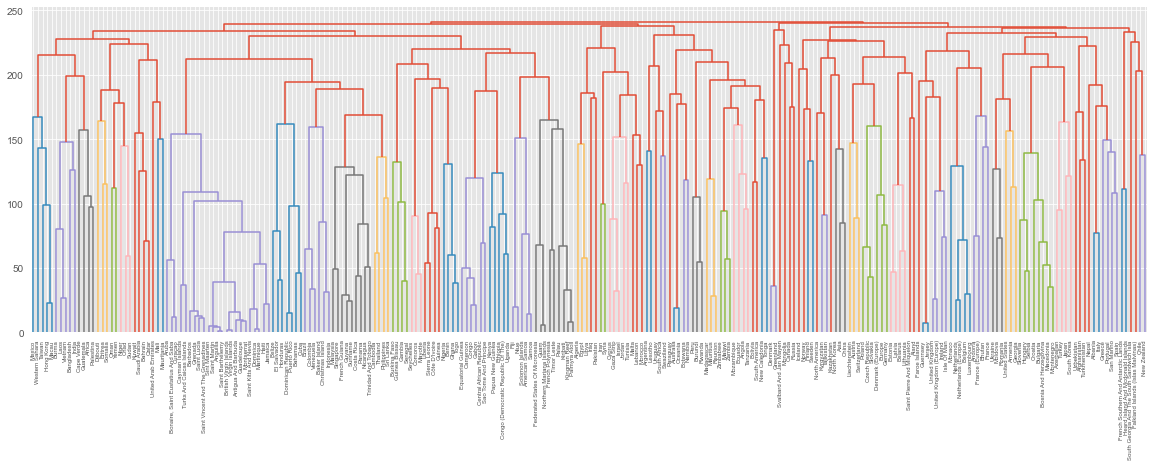

In [83]:
Clustering(clusterdf,20,6,"top",6)

#The horizontal graph is useful here to see the colors and therefore the links between countries

C:\Users\user\anaconda3\anaconda_install\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.
  warnings.warn(


Text(0.5, 0, 'Distance')

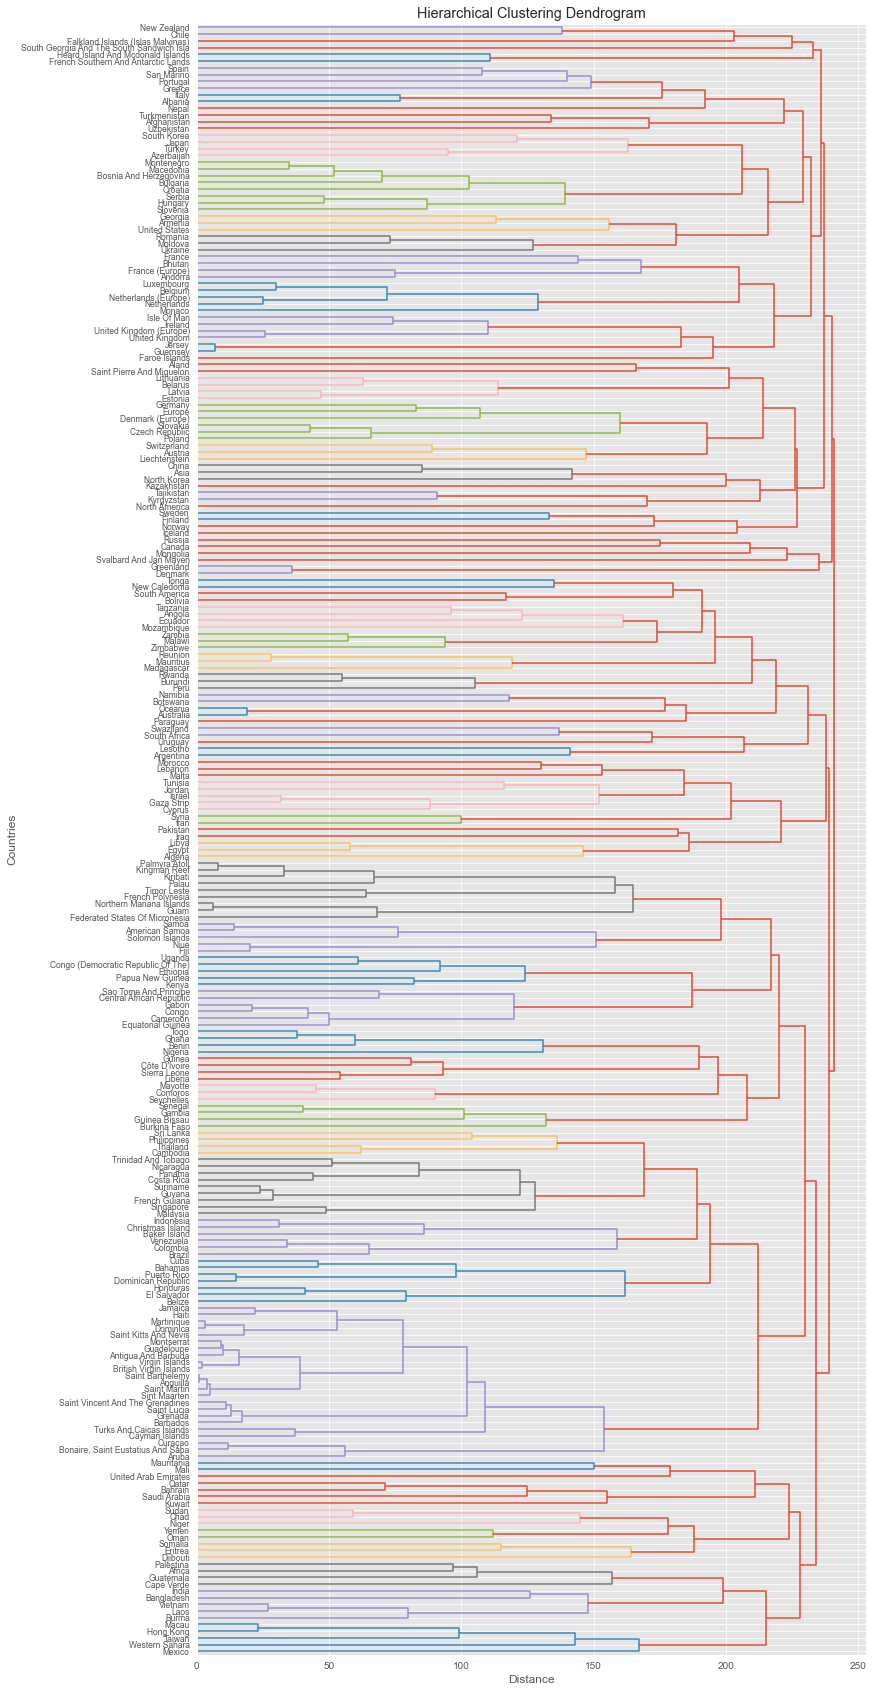

In [84]:
Clustering(clusterdf,12,30,"right",8.5)
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Countries')
plt.xlabel('Distance')

#Now, even though scrolling is necessary, this vertical dendogram is much clearer

### 2nd Clustering

C:\Users\user\anaconda3\anaconda_install\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.
  warnings.warn(


Text(0, 0.5, 'Countries')

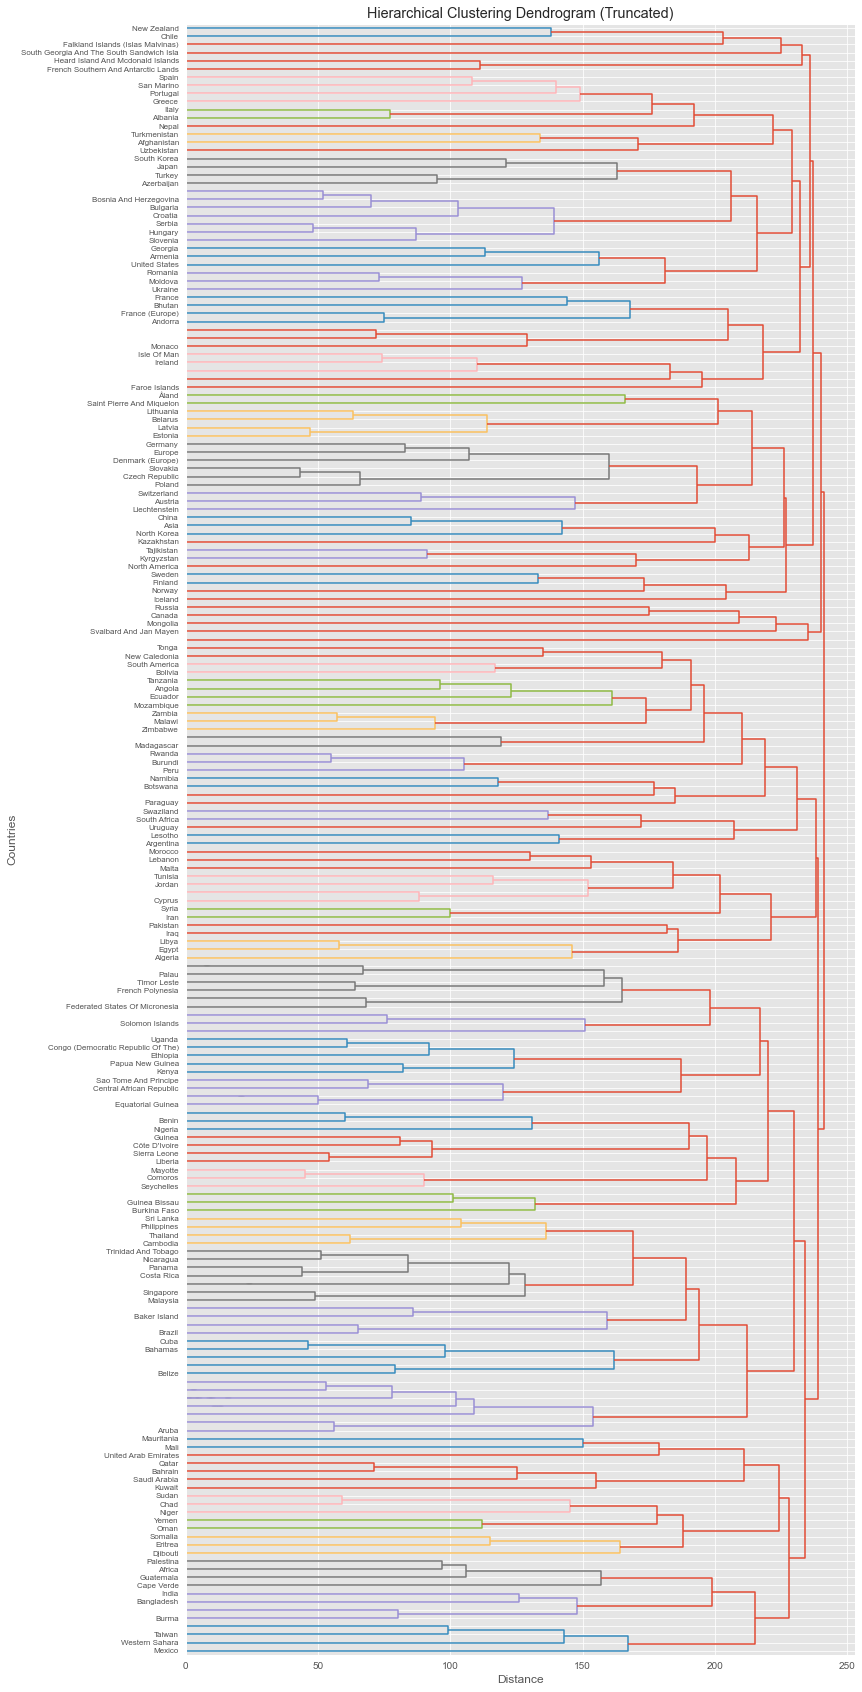

In [85]:
Cluster_70 = Clustering_truncated(clusterdf,12,30,"right",200,8)
plt.title('Hierarchical Clustering Dendrogram (Truncated)')
plt.xlabel('Distance')
plt.ylabel('Countries')


In [86]:
def delete_symbol(l,sym):
    for i in range(l.count(sym)):
        l.remove(sym)
    return l, len(l)

In [87]:
cntry_to_del = delete_symbol(Cluster_70,'')
cntry_to_del

(['Mexico',
  'Western Sahara',
  'Taiwan',
  'Burma',
  'Bangladesh',
  'India',
  'Cape Verde',
  'Guatemala',
  'Africa',
  'Palestina',
  'Djibouti',
  'Eritrea',
  'Somalia',
  'Oman',
  'Yemen',
  'Niger',
  'Chad',
  'Sudan',
  'Kuwait',
  'Saudi Arabia',
  'Bahrain',
  'Qatar',
  'United Arab Emirates',
  'Mali',
  'Mauritania',
  'Aruba',
  'Belize',
  'Bahamas',
  'Cuba',
  'Brazil',
  'Baker Island',
  'Malaysia',
  'Singapore',
  'Costa Rica',
  'Panama',
  'Nicaragua',
  'Trinidad And Tobago',
  'Cambodia',
  'Thailand',
  'Philippines',
  'Sri Lanka',
  'Burkina Faso',
  'Guinea Bissau',
  'Seychelles',
  'Comoros',
  'Mayotte',
  'Liberia',
  'Sierra Leone',
  "Côte D'Ivoire",
  'Guinea',
  'Nigeria',
  'Benin',
  'Equatorial Guinea',
  'Central African Republic',
  'Sao Tome And Principe',
  'Kenya',
  'Papua New Guinea',
  'Ethiopia',
  'Congo (Democratic Republic Of The)',
  'Uganda',
  'Solomon Islands',
  'Federated States Of Micronesia',
  'French Polynesia',
  'Ti

In [88]:
clusterdf_new = clusterdf.drop(cntry_to_del[0], axis = 0)
clusterdf_new.head()

dt,1850-01-01,1850-02-01,1850-03-01,1850-04-01,1850-05-01,1850-06-01,1850-07-01,1850-08-01,1850-09-01,1850-10-01,...,2012-11-01,2012-12-01,2013-01-01,2013-02-01,2013-03-01,2013-04-01,2013-05-01,2013-06-01,2013-07-01,2013-08-01
Country,,,,,,,,,,,,,,,,,,,,,
American Samoa,13.960,15.370,18.443,20.359,21.059,23.902,24.512,24.570,23.448,22.030,...,27.963,27.316,27.241,27.793,27.683,27.824,28.045,27.650,26.902,27.000
Anguilla,24.075,24.985,25.064,24.859,25.734,27.073,27.922,27.949,27.696,26.701,...,28.203,26.476,25.919,25.899,26.187,26.679,27.667,28.414,28.904,29.235
Antigua And Barbuda,23.930,24.845,24.984,24.879,25.711,26.988,27.714,27.672,27.346,26.351,...,27.890,26.329,25.787,25.802,26.089,26.601,27.706,28.322,28.712,28.978
Australia,13.960,15.370,18.443,20.359,21.059,23.902,24.512,24.570,23.448,22.030,...,26.935,28.417,29.861,28.311,26.590,23.305,19.377,16.018,15.933,17.748
Barbados,24.249,25.140,25.271,25.304,25.918,27.006,27.312,27.109,26.968,26.298,...,27.922,26.744,26.088,26.182,26.504,26.806,27.849,28.020,28.284,28.276


C:\Users\user\anaconda3\anaconda_install\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.
  warnings.warn(


Text(0, 0.5, 'Countries')

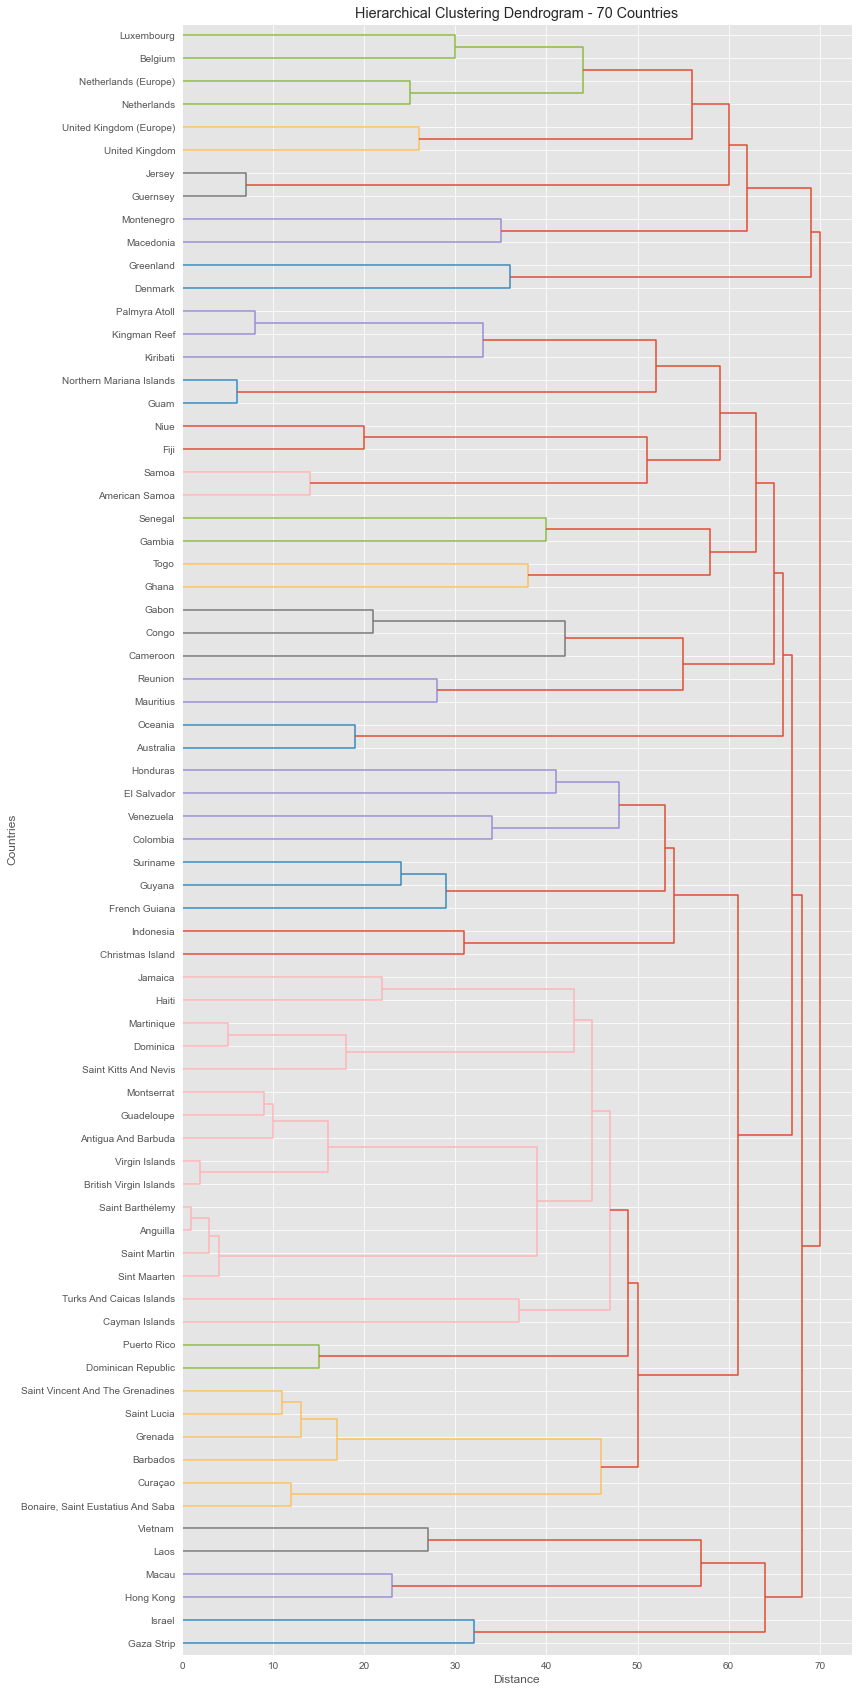

In [89]:
Clustering(clusterdf_new,12,30,"right",10)
plt.title('Hierarchical Clustering Dendrogram - 70 Countries')
plt.xlabel('Distance')
plt.ylabel('Countries')


In [94]:
pwd

'C:\\Users\\user\\Downloads\\Machine-Learning-And-Climate-Change-master'